<a href="https://colab.research.google.com/github/Alvaro-Murua/Growa-Inniative-/blob/main/LINEAL_REGRESION_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coeficiente de regresión: 19897.6255
Intercepción: -37236809.9625


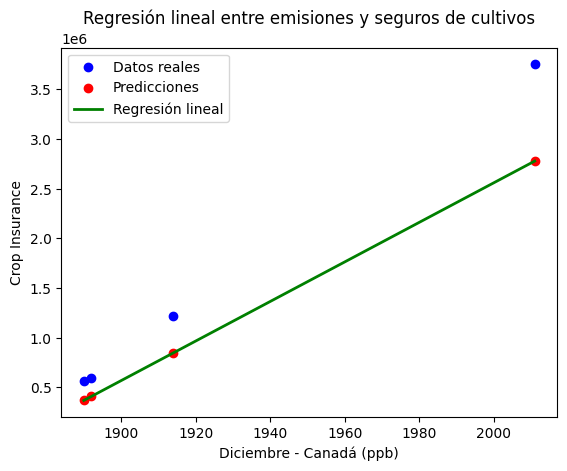

Aumento en los pagos de seguros para cultivos al llegar a 2000 ppb de emisiones: 2558440.95


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Crear el diccionario con los datos de emisiones
data_emisiones = {
    "Año": [
        1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
        2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
        2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
        2020, 2021, 2022, 2023, 2024
    ],
    "Diciembre - Canadá (ppb)": [
        1825.0, 1834.0, 1838.0, 1836.0, 1849.0, 1852.0, 1840.0, 1854.0,
        1887.0, 1858.0, 1859.0, 1863.0, 1871.0, 1883.0, 1872.0, 1885.0,
        1873.0, 1890.0, 1892.0, 1891.0, 1900.0, 1909.0, 1914.0, 1912.0,
        1929.0, 1947.0, 1952.0, 1949.0, 1962.0, 1969.0, 1995.0, 2011.0,
        2016.0, np.nan, np.nan
    ]
}

# Crear el DataFrame de emisiones
df_emisiones = pd.DataFrame(data_emisiones)

# Crear el diccionario con los datos agrícolas
data_agricultura = {
    "Año": [
        2007, 2008, 2009, 2010, 2011, 2012,
        2013, 2014, 2015, 2016, 2017, 2018,
        2019, 2020, 2021, 2022, 2023
    ],
    "Total direct payments": [
        4089433, 4133110, 3290322, 3138006, 3479924, 3404704,
        2685507, 2120698, 2134784, 2442148, 2435937, 2219067,
        3120980, 3459404, 5944084, 7345289, 6586916
    ],
    "Total privately funded programs": [
        188443, 316514, 118033, 163330, 166552, 276071,
        180268, 263522, 179227, 278964, 112521, 171233,
        251886, 200362, 327538, 278119, 179078
    ],
    "Total government funded programs": [
        3900990, 3816596, 3172289, 2974676, 3313372, 3128633,
        2505239, 1857176, 1955557, 2163184, 2323416, 2047834,
        2869094, 3259042, 5616546, 7067170, 6407838
    ],
    "Provincial Stabilization Programs": [
        878184, 655095, 695826, 210239, 459094, 504273,
        335321, 196538, 129771, 329567, 222995, 320967,
        268730, 408488, 168630, 335556, 671329
    ],
    "Crop Insurance": [
        566261, 598208, 810109, 1146642, 1304036, 1215618,
        1069476, 777446, 1107471, 1045184, 1226408, 893000,
        1408521, 1704119, 3749378, 4897368, 3881612
    ],
    "Livestock Insurance Programs": [
        110, 103, 50, 167, 877, 14009,
        13095, 2306, 5816, 32271, 3685, 10157,
        57765, 122148, 1859, 7684, 848
    ],
}

# Crear el DataFrame de agricultura
df_agricultura = pd.DataFrame(data_agricultura)

# Filtrar solo los años que están en ambos DataFrames
df_filtered_emisiones = df_emisiones[df_emisiones['Año'].isin(df_agricultura['Año'])]
df_filtered_agricultura = df_agricultura[df_agricultura['Año'].isin(df_emisiones['Año'])]

# Unir los DataFrames filtrados
df_combined = pd.merge(df_filtered_emisiones, df_filtered_agricultura, on='Año')

# Filtrar las columnas relevantes
df_filtered = df_combined[['Diciembre - Canadá (ppb)', 'Crop Insurance']].dropna()

# Separar las variables independientes y dependientes
X = df_filtered[['Diciembre - Canadá (ppb)']]  # Variable independiente
y = df_filtered['Crop Insurance']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Mostrar los coeficientes
coef = model.coef_[0]
intercept = model.intercept_
print(f"Coeficiente de regresión: {coef:.4f}")
print(f"Intercepción: {intercept:.4f}")

# Graficar los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regresión lineal')
plt.xlabel('Diciembre - Canadá (ppb)')
plt.ylabel('Crop Insurance')
plt.title('Regresión lineal entre emisiones y seguros de cultivos')
plt.legend()
plt.show()

# Predecir el aumento en los pagos de seguros para cultivos
emisiones_aumentar = np.array([[2000]])  # Ejemplo: aumento de emisiones a 2000 ppb
aumento_predicho = model.predict(emisiones_aumentar)
print(f"Aumento en los pagos de seguros para cultivos al llegar a 2000 ppb de emisiones: {aumento_predicho[0]:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Column
    [0] FloatSlider(end=2100, name='Emissions (ppb)', start=1800, step=1, value=2000)
    [1] ParamFunction(function, _pane=Str, defer_load=False)

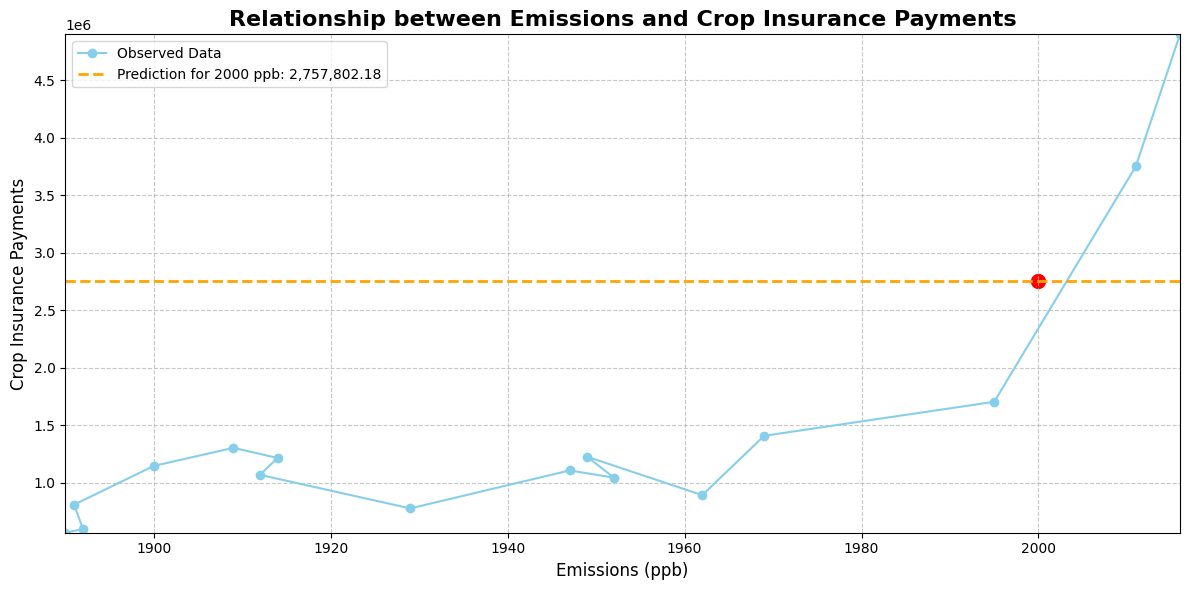

In [1]:
import pandas as pd
import numpy as np
import panel as pn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create the dictionary with emissions data
data_emissions = {
    "Year": [
        1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
        2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
        2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
        2020, 2021, 2022, 2023, 2024
    ],
    "December - Canada (ppb)": [
        1825.0, 1834.0, 1838.0, 1836.0, 1849.0, 1852.0, 1840.0, 1854.0,
        1887.0, 1858.0, 1859.0, 1863.0, 1871.0, 1883.0, 1872.0, 1885.0,
        1873.0, 1890.0, 1892.0, 1891.0, 1900.0, 1909.0, 1914.0, 1912.0,
        1929.0, 1947.0, 1952.0, 1949.0, 1962.0, 1969.0, 1995.0, 2011.0,
        2016.0, np.nan, np.nan
    ]
}

# Create the emissions DataFrame
df_emissions = pd.DataFrame(data_emissions)

# Create the dictionary with agricultural data
data_agriculture = {
    "Year": [
        2007, 2008, 2009, 2010, 2011, 2012,
        2013, 2014, 2015, 2016, 2017, 2018,
        2019, 2020, 2021, 2022, 2023
    ],
    "Total direct payments": [
        4089433, 4133110, 3290322, 3138006, 3479924, 3404704,
        2685507, 2120698, 2134784, 2442148, 2435937, 2219067,
        3120980, 3459404, 5944084, 7345289, 6586916
    ],
    "Crop Insurance": [
        566261, 598208, 810109, 1146642, 1304036, 1215618,
        1069476, 777446, 1107471, 1045184, 1226408, 893000,
        1408521, 1704119, 3749378, 4897368, 3881612
    ]
}

# Create the agriculture DataFrame
df_agriculture = pd.DataFrame(data_agriculture)

# Filter only the years that are present in both DataFrames
df_filtered_emissions = df_emissions[df_emissions['Year'].isin(df_agriculture['Year'])]
df_filtered_agriculture = df_agriculture[df_agriculture['Year'].isin(df_emissions['Year'])]

# Merge the filtered DataFrames
df_combined = pd.merge(df_filtered_emissions, df_filtered_agriculture, on='Year')

# Remove rows with NaN values
df_combined.dropna(inplace=True)

# Fit the linear regression model
X = df_combined[['December - Canada (ppb)']]
y = df_combined['Crop Insurance']
model = LinearRegression()
model.fit(X, y)

# Function to update the plot
def update_plot(emission):
    predicted_payment = model.predict(np.array([[emission]]))[0]

    plt.figure(figsize=(12, 6))
    plt.plot(df_combined['December - Canada (ppb)'], df_combined['Crop Insurance'], marker='o', linestyle='-', color='skyblue', label='Observed Data')
    plt.axhline(y=predicted_payment, color='orange', linestyle='--', linewidth=2, label=f'Prediction for {emission:.0f} ppb: {predicted_payment:,.2f}')
    plt.scatter(emission, predicted_payment, color='red', s=100)
    plt.title('Relationship between Emissions and Crop Insurance Payments', fontsize=16, fontweight='bold')
    plt.xlabel('Emissions (ppb)', fontsize=12)
    plt.ylabel('Crop Insurance Payments', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlim(df_combined['December - Canada (ppb)'].min(), df_combined['December - Canada (ppb)'].max())
    plt.ylim(df_combined['Crop Insurance'].min(), df_combined['Crop Insurance'].max())
    plt.tight_layout()

    return plt

# Create a slider widget for emissions
emission_slider = pn.widgets.FloatSlider(name='Emissions (ppb)', start=1800, end=2100, step=1, value=2000)

# Create a Panel for the interactive plot
interactive_plot = pn.bind(update_plot, emission=emission_slider)

# Display the panel
pn.Column(emission_slider, interactive_plot).servable()
